##This is Assignment 6 by Dhairya 

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Q1 Architecture CSE edition
M = float(input("Enter a value for M: "))

x = np.linspace(-10, 10, 100)
y1 = M * x**2
y2 = M * np.sin(x)

plt.figure(figsize=(8, 5))

plt.plot(x, y1, 'r--', label="y = M * x^2")
plt.plot(x, y2, 'b-', label="y = M * sin(x)")

plt.title("Plot of y = M * x^2 and y = M * sin(x)")
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()#still no idea why this has such a legendary name....
plt.grid(True)

plt.show()


/tmp/ipykernel_49606/3886920039.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Subjects", y="Scores", data=df, palette="viridis")


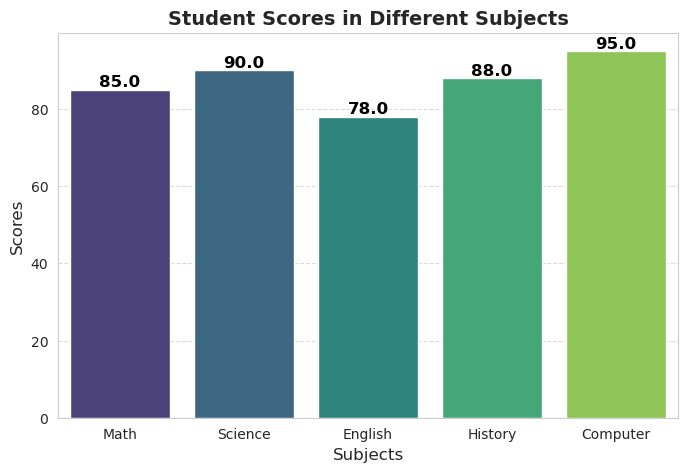

In [19]:
#Q2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataset
data = {
    "Subjects": ["Math", "Science", "English", "History", "Computer"],
    "Scores": [85, 90, 78, 88, 95]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set style
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Subjects", y="Scores", data=df, palette="viridis")

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize plot
plt.title("Student Scores in Different Subjects", fontsize=14, fontweight='bold')
plt.xlabel("Subjects", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

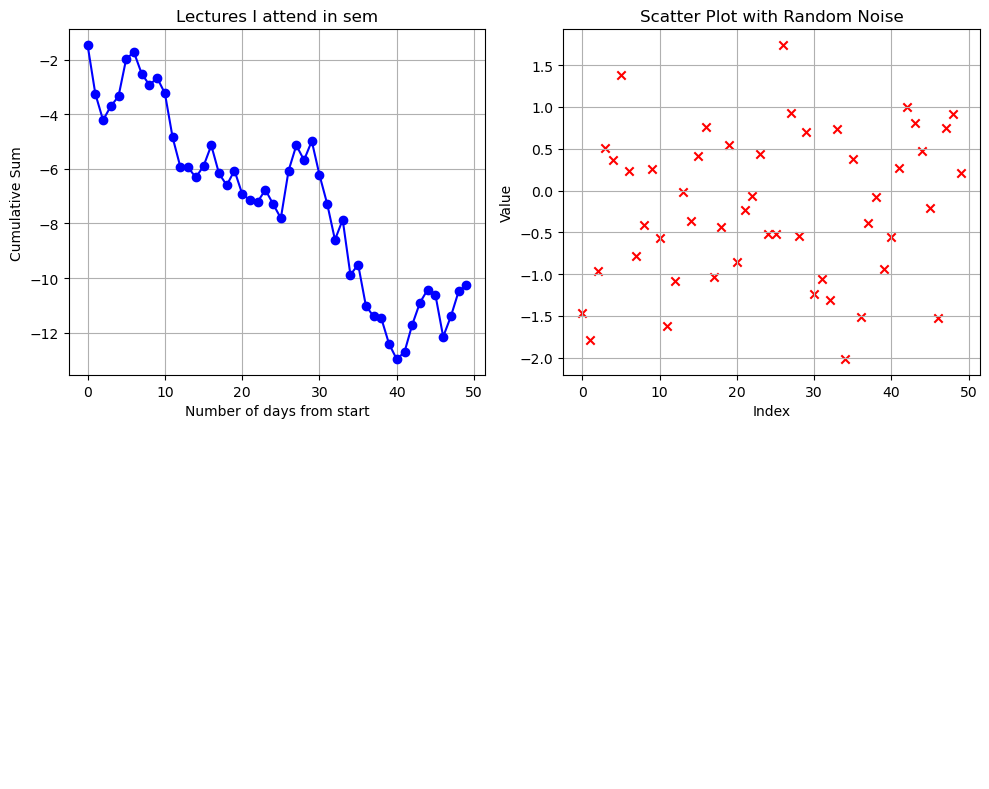

In [17]:
#Q3
import numpy as np
import matplotlib.pyplot as plt

roll_number = 102317283
np.random.seed(roll_number)

data = np.random.randn(50)

#cumlative sum
cumsum_data = np.cumsum(data)

#Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#Line plot for cumulative sum
axs[0, 0].plot(cumsum_data, marker='o', color='b', linestyle='-')
axs[0, 0].set_title("Lectures I attend in sem")
axs[0, 0].set_xlabel("Number of days from start")
axs[0, 0].set_ylabel("Cumulative Sum")
axs[0, 0].grid(True)

#Scatter plot with random noise
axs[0, 1].scatter(range(50), data, color='r', marker='x')
axs[0, 1].set_title("Scatter Plot with Random Noise")
axs[0, 1].set_xlabel("Index")
axs[0, 1].set_ylabel("Value")
axs[0, 1].grid(True)

#Hide unused subplots
axs[1, 0].axis("off")
axs[1, 1].axis("off")

plt.tight_layout()
plt.show()


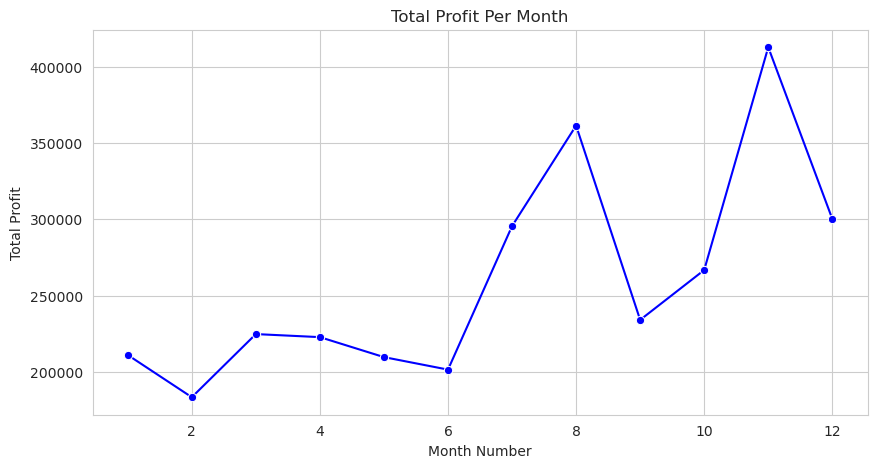

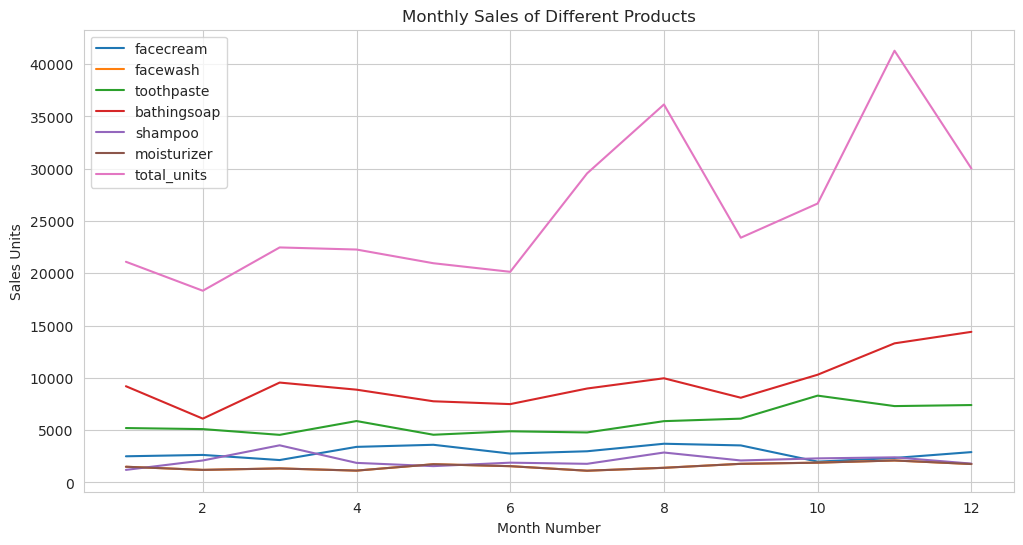

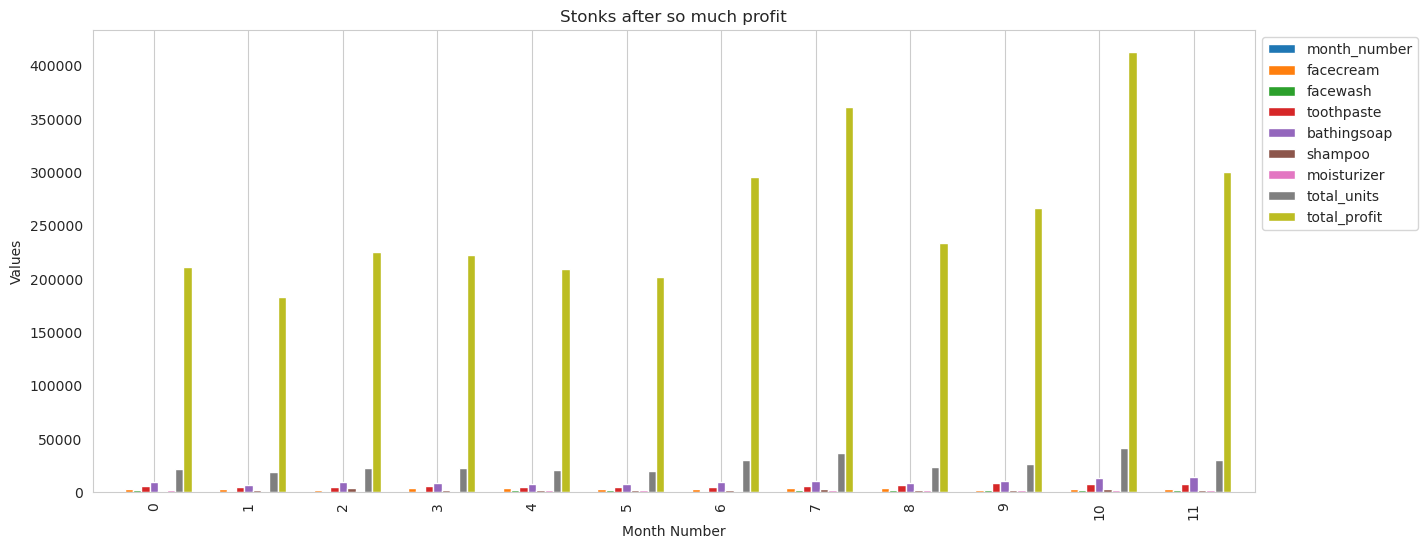

In [20]:
#Q4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load dataset from GitHub
url = "https://raw.githubusercontent.com/AnjulaMehto/MCA/main/company_sales_data.csv"
df = pd.read_csv(url)

#1. Line plot for total profit of all months
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['month_number'], y=df['total_profit'], marker='o', color='b')
plt.title("Total Profit Per Month")
plt.xlabel("Month Number")
plt.ylabel("Total Profit")
plt.grid(True)
plt.show()

#2. Multiline plot for all product sales
plt.figure(figsize=(12, 6))
for column in df.columns[1:-1]:  # Excluding month_number and total_profit
    sns.lineplot(x=df['month_number'], y=df[column], label=column)

plt.title("Monthly Sales of Different Products")
plt.xlabel("Month Number")
plt.ylabel("Sales Units")
plt.legend()
plt.grid(True)
plt.show()

#3. Bar chart for all features/attributes
df.plot(kind='bar', figsize=(15, 6), width=0.8)
plt.title("Stonks after so much profit")
plt.xlabel("Month Number")
plt.ylabel("Values")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y")
plt.show()


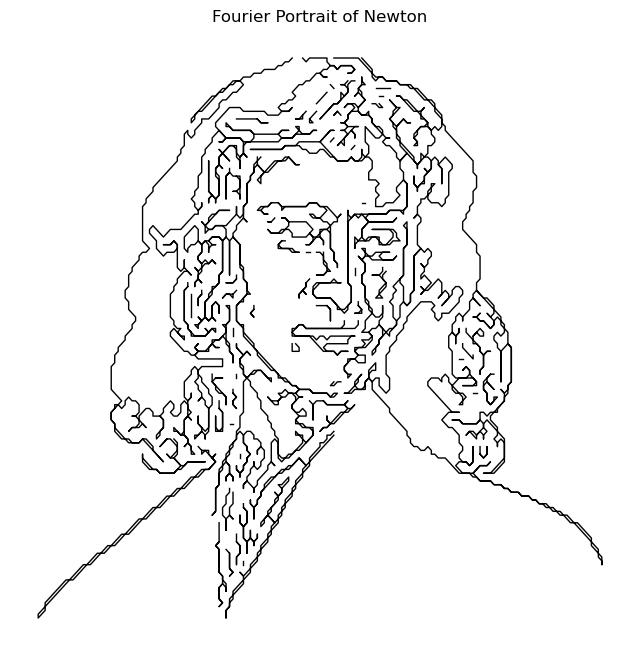

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import base64
from io import BytesIO
from PIL import Image
import requests

# Function to decode base64 image
image_data = base64.b64decode(base64_string)
image_array = np.frombuffer(image_data, dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

# Extract contours from image
def extract_contours(image):
    edges = cv2.Canny(image, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def fourier_series_coefficients(n_terms, contours):
    t = np.linspace(-np.pi, np.pi, 400)
    x = np.zeros_like(t)
    for n in range(1, n_terms + 1):
        coeff = (-1) ** (n + 1) * (4 / (n * np.pi))
        x += coeff * np.sin(n * t)
    return t, x

def draw_newton_portrait():
    n_terms = 50  # Number of Fourier terms for approximation
    contours = extract_contours(image)
    plt.figure(figsize=(8, 8))
    for contour in contours:
        contour = contour.squeeze()
        if contour.ndim == 2:
            plt.plot(contour[:, 0], -contour[:, 1], 'k', linewidth=1)
    plt.title("Fourier Portrait of Newton")
    plt.axis("off")
    plt.show()

draw_newton_portrait()
